In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Program Files (x86)\anaconda\summer_camp_data.csv', encoding = 'cp1251')
print(df.head(3))

         date  source   medium delivery_available device_type promo_activated  \
0  2020-05-11  google  organic      Не определено     Десктоп              no   
1  2020-05-11  yandex      cpc      Не определено      Мобайл             yes   
2  2020-05-11  google      cpc      Не определено      Мобайл              no   

  filter_used  pageviews  visits  productClick  addToCart  checkout  \
0          no       3120    1233          5240       1048       525   
1          no       3302     544          9930       1984      1416   
2          no       2970    1450          5460       1090       599   

   transactions   revenue  
0            90   86649.0  
1           217  244478.0  
2           100  105150.0  


In [15]:
#Наличие пустых ячеек

nan_df = df[df.isna().any(axis = 1)]
print(nan_df)

Empty DataFrame
Columns: [date, source, medium, delivery_available, device_type, promo_activated, filter_used, pageviews, visits, productClick, addToCart, checkout, transactions, revenue]
Index: []


In [5]:
#Процент пустых ячеек

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

date - 0.0%
source - 0.0%
medium - 0.0%
delivery_available - 0.0%
device_type - 0.0%
promo_activated - 0.0%
filter_used - 0.0%
pageviews - 0.0%
visits - 0.0%
productClick - 0.0%
addToCart - 0.0%
checkout - 0.0%
transactions - 0.0%
revenue - 0.0%


In [6]:
#Типы данных

df.dtypes

date                   object
source                 object
medium                 object
delivery_available     object
device_type            object
promo_activated        object
filter_used            object
pageviews               int64
visits                  int64
productClick            int64
addToCart               int64
checkout                int64
transactions            int64
revenue               float64
dtype: object

In [7]:
#Убираем нулевые десятичные хвосты (.0) в коолонке revenue - меняем тип на целый

df['revenue'] = df['revenue'].astype('int64')

In [8]:
# Задание1 
# Канал, принесший больше всего дохода за всё время

# Группируем данные по каналу(source) и выручке(revenue) 
# Сортитруем по убыванию и выводим первый результат
# Ответ: канал - yandex, выручка - 467474813

grouped = df.groupby('source').sum()['revenue'].sort_values(ascending=False).head(1)
print(grouped)

source
yandex    467474813
Name: revenue, dtype: int64


In [12]:
# Задание 2.0
# Сравниваем средние чеки до и после введения ограничений в связи с коронавирусом.
# В качестве формулы среднего чека брал: ср.чек = выручка(revenue) / кол-во транзакций(transactions)
# Ответ: изменение чека после введения ограничений =  41.6 %

#Выручка до ограничений
df_before_covid = df[df['date'] <= '2020-03-14']
revenue_before_covid = df_before_covid['revenue'].sum()
print("Общая выручка до ограничений с промо =", revenue_before_covid)

#Транзакции до ограничений
trans_before_covid = df_before_covid['transactions'].sum()
print("Общее количество транзакций до ограничений с промо =", trans_before_covid)

#Средний чек до ограничений
check_before = round(revenue_before_covid / trans_before_covid)
print("Средний чек до ограничений с промо =", check_before)
print()


#Выручка после ограничений
df_after_covid = df[df['date'] > '2020-03-14']
revenue_after_covid = df_after_covid['revenue'].sum()
print("Общая выручка после ограничений с промо =", revenue_after_covid)

#Транзакции после ограничений
trans_after_covid = df_before_covid['transactions'].sum()
print("Общее количество транзакций после ограничений с промо =", trans_after_covid)

#Средний чек после ограничений
check_after = round(revenue_after_covid / trans_after_covid)
print("Средний чек после ограничений с промо =", check_after)
print()

#Изменение среднегоо чека после ограничений
check_change = round(check_before / check_after, 4) * 100
print('Изменение среднего чека после введения ограничений = ', check_change, '%')


Общая выручка до ограничений с промо = 374962886
Общее количество транзакций до ограничений с промо = 291489
Средний чек до ограничений с промо = 1286

Общая выручка после ограничений с промо = 900874303
Общее количество транзакций после ограничений с промо = 291489
Средний чек после ограничений с промо = 3091

Изменение среднего чека после введения ограничений =  41.6 %


In [13]:
# Задание 2.1
# Для пользователей с промокодом
# Ответ: изменение чека после введения ограничений с промо =  37.93 %

#Выручка до ограничений с промо
df_before_covid_promo = df[(df['date'] <= '2020-03-14') & (df['promo_activated'] == 'yes')]
revenue_before_covid_promo = df_before_covid_promo['revenue'].sum()
print("Общая выручка до ограничений с промо =", revenue_before_covid_promo)

#Транзакции до ограничений с промо
trans_before_covid_promo = df_before_covid_promo['transactions'].sum()
print("Общее количество транзакций до ограничений с промо =", trans_before_covid_promo)

#Средний чек до ограничений с промо
check_before_promo = round(revenue_before_covid_promo / trans_before_covid_promo)
print("Средний чек до ограничений с промо =", check_before_promo)
print()


#Выручка после ограничений с промо
df_after_covid_promo = df[(df['date'] > '2020-03-14') & (df['promo_activated'] == 'yes')]
revenue_after_covid_promo = df_after_covid_promo['revenue'].sum()
print("Общая выручка после ограничений с промо =", revenue_after_covid_promo)

#Транзакции после ограничений с промо
trans_after_covid_promo = df_before_covid_promo['transactions'].sum()
print("Общее количество транзакций после ограничений с промо =", trans_after_covid_promo)

#Средний чек после ограничений с промо
check__after_promo = round(revenue_after_covid_promo / trans_after_covid_promo)
print("Средний чек после ограничений с промо =", check__after_promo)
print()

#Изменение среднего чека после ограничений с промо
check_change_promo = round(check_before_promo / check__after_promo, 4) * 100
print('Изменение среднего чека после введения ограничений с промо = ', check_change_promo, '%')

Общая выручка до ограничений с промо = 182296244
Общее количество транзакций до ограничений с промо = 141463
Средний чек до ограничений с промо = 1289

Общая выручка после ограничений с промо = 480738521
Общее количество транзакций после ограничений с промо = 141463
Средний чек после ограничений с промо = 3398

Изменение среднего чека после введения ограничений с промо =  37.93 %


In [14]:
# Задание 2.2
# Для пользователей без промокода 
# Ответ: изменение чека после введения ограничений без промо =  40.07 %

#Выручка до ограничений без промо
df_before_covid_no_promo = df[(df['date'] <= '2020-03-14') & (df['promo_activated'] == 'no')]
revenue_before_covid_no_promo = df_before_covid_no_promo['revenue'].sum()
print("Общая выручка до ограничений без промо =", revenue_before_covid_no_promo)

#Транзакции до ограничений без промо
trans_before_covid_no_promo = df_before_covid_no_promo['transactions'].sum()
print("Общее количество транзакций до ограничений без промо =", trans_before_covid_no_promo)

#Средний чек до ограничений без промо
check_before_no_promo = round(revenue_before_covid_no_promo / trans_before_covid_no_promo)
print("Средний чек до ограничений без промо =", check_before_no_promo)
print()


#Выручка после ограничений без промо
df_after_covid_no_promo = df[(df['date'] > '2020-03-14') & (df['promo_activated'] == 'yes')]
revenue_after_covid_no_promo = df_after_covid_no_promo['revenue'].sum()
print("Общая выручка после ограничений без промо =", revenue_after_covid_no_promo)

#Выручка после ограничений без промо
trans_after_covid_no_promo = df_before_covid_no_promo['transactions'].sum()
print("Общее количество транзакций после ограничений без промо =", trans_after_covid_no_promo)

#Выручка после ограничений без промо
check__after_no_promo = round(revenue_after_covid_no_promo / trans_after_covid_no_promo)
print("Средний чек после ограничений без промо =", check__after_no_promo)
print()

#Изменение среднегоо чека после ограничений без промо
check_change_no_promo = round(check_before_no_promo / check__after_no_promo, 4) * 100
print('Изменение среднего чека после введения ограничений без промо = ', check_change_no_promo, '%')

Общая выручка до ограничений без промо = 192666642
Общее количество транзакций до ограничений без промо = 150026
Средний чек до ограничений без промо = 1284

Общая выручка после ограничений без промо = 480738521
Общее количество транзакций после ограничений без промо = 150026
Средний чек после ограничений без промо = 3204

Изменение среднего чека после введения ограничений без промо =  40.07 %


In [16]:
# Задание3
# Расчитывал CR (коэффициент конверсии в транзакцию) по формуле: 
# CR = Число транзакций (transactions) / Общее число пользователей(visits) 
# Подразумеваю, что 'visits' - это пользователи, а 'pageviews' - просмотры страницы, их может быть несколько на одного пользователя

# Стоит рассчитать суммы транзакций и общее число пользователей по будням и выходным дням 
# Добавили колонку с днем недели ('day_of_week') и дневным CR ('CR_daily')
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df['CR_daily'] = (df['transactions'] / df['visits']) * 100


# Для будних дней(weekdays):
df_weekdays = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Число транзакции в буднии дни
trans_weekdays = df_weekdays['transactions'].sum()

# Число пользователей(посетителей) в буднии дни
visitors_weekdays = df_weekdays['visits'].sum()

# Коэффициент конверсии в транзакцию в буднии дни
CR_weekdays = round(trans_weekdays / visitors_weekdays, 4) * 100
print('Коэффициент конверсии в транзакцию в буднии дни =', CR_weekdays, '%')
print()


# Для выходных(weekends):
df_weekends = df[df['day_of_week'].isin(['Sunday', 'Saturday'])]

# Число транзакции в выходные
trans_weekends = df_weekends['transactions'].sum()

# Число пользователей(посетителей) в выходные
visitors_weekends = df_weekends['visits'].sum()

# Коэффициент конверсии в транзакцию в выходные
CR_weekends = round(trans_weekends / visitors_weekends, 4) * 100
print('Коэффициент конверсии в транзакцию в выходные =', CR_weekends, '%')
print()


# Находим t-value, p-value для дневных CR-значений будних и выходных
# Учитываем разное количество результатов в выборках 
from scipy.stats import ttest_ind
import pingouin as pt

a = df_weekdays['CR_daily']
b = df_weekends['CR_daily']
t, p = ttest_ind(a, b, equal_var=False)
print("Т-тест:            t-значение = %g  p-значение = %g" % (t, p))

pt.ttest(a, b, paired=False)

Коэффициент конверсии в транзакцию в буднии дни = 15.18 %

Коэффициент конверсии в транзакцию в выходные = 17.09 %

Т-тест:            t-значение = -6.49628  p-значение = 8.36521e-11


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.496279,29249.973106,two-sided,8.365213e-11,"[-3.1, -1.66]",0.06183,1.549e+07,1.0


In [ ]:
# Ответ на Задание3: значение p = 8.36521e-11 - достаточно мало, мы нашли статистически значимые различия в CR будних и выходных
# Мы можем сказать, что с уверенностью в 95%, CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни

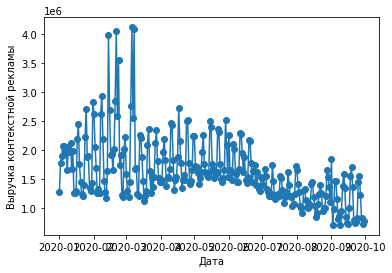

In [63]:
# Задание 4 
# Cпрогнозировать объем дохода, полученного с пользователей, 
# приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед


# Строим распределение значений выручки от контекстной рекламы по дням 

from sklearn.linear_model import LinearRegression
from scipy import stats
from matplotlib.pyplot import *
import datetime as dt
import pandas_datareader as pdr

df['revenue'] = df['revenue'].astype('int64')
df_cpc = df[df['medium'].isin(['cpc'])]
df_cpc.dtypes

df_cpc_grouped = df_cpc.groupby('date').sum() 
df_cpc_grouped = df_cpc_grouped.reset_index()
df_cpc_grouped["date"]
df_cpc_grouped['revenue'] = pd.to_numeric(df_cpc_grouped['revenue'], errors='coerce')



plt.scatter(df_cpc_grouped['date'], df_cpc_grouped['revenue'])
plt.xlabel('Дата')
plt.ylabel('Выручка контекстной рекламы')
plt.plot(df_cpc_grouped['date'], df_cpc_grouped['revenue'])

plt.show()







In [74]:
# Получаем уравнение линейной регрессии и поодставляем значение даты(x) + полгода

df['revenue'] = df['revenue'].astype('int64')
df_cpc = df[df['medium'].isin(['cpc'])]
df_cpc.dtypes

df_cpc_grouped = df_cpc.groupby('date').sum() 
df_cpc_grouped = df_cpc_grouped.reset_index()
df_cpc_grouped["date"]
df_cpc_grouped['revenue'] = pd.to_numeric(df_cpc_grouped['revenue'], errors='coerce')

df_cpc_grouped['date'] = pd.to_datetime(df_cpc_grouped['date'])
df_cpc_grouped['date']= df_cpc_grouped['date'].map(dt.datetime.toordinal)
reg = LinearRegression()
reg.fit(df_cpc_grouped[['date']], df_cpc_grouped['revenue'])


# Уравнение линии регрессии
# y = k * x + b

print('коэффициент наклона "к"=', reg.coef_)
print('значение пересечения "b"=', reg.intercept_)
print('значение последней даты + полгода "x"=', df_cpc_grouped['date'].max() + 180)
print('значение последней даты "x"=', df_cpc_grouped['date'].max())
y = reg.coef_ * (df_cpc_grouped['date'].max() + 180) + reg.intercept_
print('Ожидаемая выручка через пол года =', y)


коэффициент наклона "к"= [-3642.10255059]
значение пересечения "b"= 2687899386.566313
значение последней даты + полгода "x"= 737878
значение последней даты "x"= 737698
Ожидаемая выручка через пол года = [472040.74346876]


In [ ]:
# Ответ: При расчете прогноза через линейную регрессию 
# ожидаемая выручка через пол года = [472040.74346876]